<a href="https://colab.research.google.com/github/aweeeaja/Machine-learning/blob/main/model_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Read Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ctg = pd.read_csv('/content/drive/MyDrive/Machine Learning/TB/dataset/Cardiotocographic_normalisasi.csv')
ctg.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,AD,DE,LD,FS,SUSP,CLASS,NSP
0,0.259259,0.259259,0.000000,0.0,0.000000,0.813333,0.044118,0.472527,0.047337,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.888889,2.0
1,0.481481,0.481481,0.153846,0.0,0.173913,0.066667,0.279412,0.000000,0.205128,0.125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.555556,1.0
2,0.500000,0.500000,0.076923,0.0,0.217391,0.053333,0.279412,0.000000,0.264300,0.125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.555556,1.0
3,0.518519,0.518519,0.076923,0.0,0.260870,0.053333,0.323529,0.000000,0.453649,0.125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.555556,1.0
4,0.481481,0.481481,0.153846,0.0,0.217391,0.053333,0.323529,0.000000,0.392505,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,1.0


# KMEANS CLUSTERING

Centroids:
[[ 6.67418688e-01  6.67418688e-01  2.73330730e-03  5.86816431e-03
   6.17965129e-02  7.27783418e-01  3.28456256e-02  3.90528253e-01
   1.46206910e-01  7.61421320e-03  6.93889390e-18 -9.02056208e-17
   0.00000000e+00  1.11022302e-16 -4.44089210e-16  0.00000000e+00
  -6.24500451e-17  1.00000000e+00]
 [ 4.50412762e-01  4.50412762e-01  1.88948100e-01  3.01952491e-02
   2.29308539e-01  3.60602410e-01  2.52436215e-01  1.15848007e-02
   1.40104798e-01  2.54518072e-01  3.01204819e-03  3.46385542e-02
   0.00000000e+00  1.00000000e+00 -9.43689571e-16  2.15105711e-16
  -1.52655666e-16 -3.46944695e-16]
 [ 4.97147429e-01  4.97147429e-01  9.97784307e-02  1.00909507e-02
   1.56543519e-01  4.56330620e-01  1.65236289e-01  9.34650822e-02
   1.67823298e-01  7.67845961e-02  3.75704446e-03  3.47526612e-02
   0.00000000e+00  1.11022302e-16  1.57795867e-01  6.70006262e-02
   4.32060113e-02  1.20736754e-15]]
Labels:
[2 1 1 ... 2 2 2]


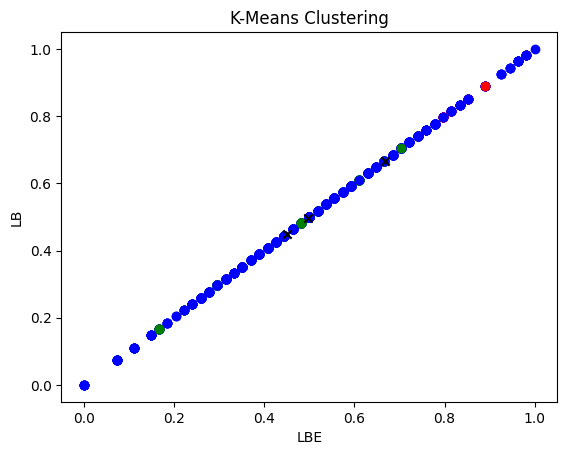

Predictions:
[2 1 1 ... 2 2 2]


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Asumsikan ctg adalah sebuah DataFrame
# Menghapus kolom 'CLASS' dan 'NSP' dari data input karena mereka adalah target
x_train = ctg[['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV',
               'MLTV', 'DL', 'DS', 'DP', 'DR', 'AD', 'DE', 'LD', 'FS', 'SUSP']]

# Melakukan K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_train)

# Mendapatkan label klaster dan centroid
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Centroids:")
print(centroids)
print("Labels:")
print(labels)

# Visualisasi hasil klasterisasi (menggunakan dua fitur pertama saja)
colors = ['r', 'g', 'b']  # Warna untuk setiap klaster
for i in range(len(x_train)):
    plt.scatter(x_train.iloc[i, 0], x_train.iloc[i, 1], color=colors[labels[i]])

# Menandai posisi centroid
plt.scatter(centroids[:, 0], centroids[:, 1], color='k', marker='x')

plt.xlabel('LBE')
plt.ylabel('LB')
plt.title('K-Means Clustering')
plt.show()

# Melakukan prediksi klaster untuk data baru (tanpa kolom 'CLASS' dan 'NSP')
x_test = ctg[['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV',
              'MLTV', 'DL', 'DS', 'DP', 'DR', 'AD', 'DE', 'LD', 'FS', 'SUSP']]

predictions = kmeans.predict(x_test)
print("Predictions:")
print(predictions)


# CONFUSION MATRIX

Confusion Matrix sebelum penyesuaian klaster:
[[   0  330 1325]
 [ 196    2   97]
 [   1    0  175]]
Accuracy Score setelah penyesuaian klaster: 0.8706491063029163
F1 Score: 0.8294987877365628
Precision: 0.805937058117032
Recall: 0.8706491063029163
Confusion Matrix setelah penyesuaian klaster:
[[1655    0    0]
 [  99  196    0]
 [ 175    1    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


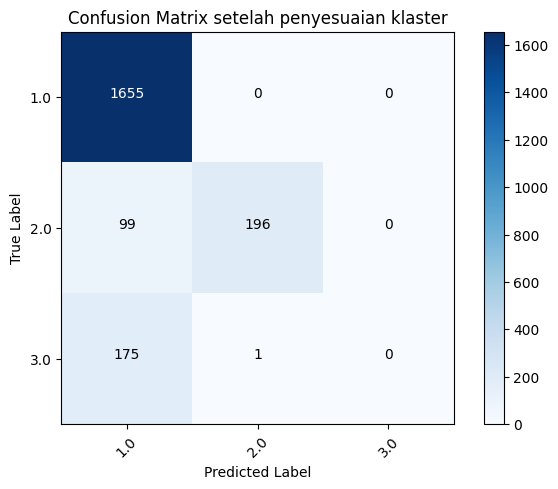

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Konversi label klaster menjadi label numerik
encoder = LabelEncoder()
true_labels = encoder.fit_transform(ctg['NSP'])

# Mencocokkan klaster dengan label asli menggunakan Confusion Matrix
cm = confusion_matrix(true_labels, labels)
print("Confusion Matrix sebelum penyesuaian klaster:")
print(cm)

# Untuk memetakan klaster ke label, kita perlu menyesuaikan label klaster agar cocok dengan label asli
# Asumsikan kita menggunakan argmax untuk memetakan klaster ke kelas yang paling sering muncul dalam klaster tersebut
from scipy.stats import mode

def map_clusters_to_labels(true_labels, cluster_labels):
    mapped_labels = np.zeros_like(cluster_labels)
    for i in range(3):  # Misalkan ada 3 klaster
        mask = (cluster_labels == i)
        mapped_labels[mask] = mode(true_labels[mask])[0]
    return mapped_labels

# Memetakan label klaster ke label asli
mapped_labels = map_clusters_to_labels(true_labels, labels)

# Menghitung Accuracy Score
accuracy = accuracy_score(true_labels, mapped_labels)
print("Accuracy Score setelah penyesuaian klaster:", accuracy)

# Menghitung F1 Score
f1 = f1_score(true_labels, mapped_labels, average='weighted')
print("F1 Score:", f1)

# Menghitung Precision
precision = precision_score(true_labels, mapped_labels, average='weighted')
print("Precision:", precision)

# Menghitung Recall
recall = recall_score(true_labels, mapped_labels, average='weighted')
print("Recall:", recall)

# Menghitung Confusion Matrix setelah penyesuaian klaster
cm_adjusted = confusion_matrix(true_labels, mapped_labels)
print("Confusion Matrix setelah penyesuaian klaster:")
print(cm_adjusted)

# Menampilkan confusion matrix dalam bentuk visual
plt.imshow(cm_adjusted, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix setelah penyesuaian klaster")
plt.colorbar()
tick_marks = np.arange(len(np.unique(true_labels)))
plt.xticks(tick_marks, encoder.classes_, rotation=45)
plt.yticks(tick_marks, encoder.classes_)

# Menambahkan label pada matriks
thresh = cm_adjusted.max() / 2.
for i in range(cm_adjusted.shape[0]):
    for j in range(cm_adjusted.shape[1]):
        plt.text(j, i, format(cm_adjusted[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_adjusted[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
